### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.nunique()

Unnamed: 0          1303
Company               19
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price                791
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df = df.drop(columns=['Unnamed: 0'],axis=0)

<AxesSubplot:>

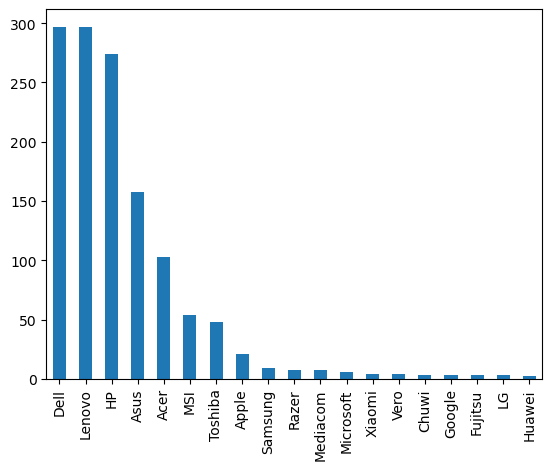

In [8]:
df['Company'].value_counts().plot(kind='bar')

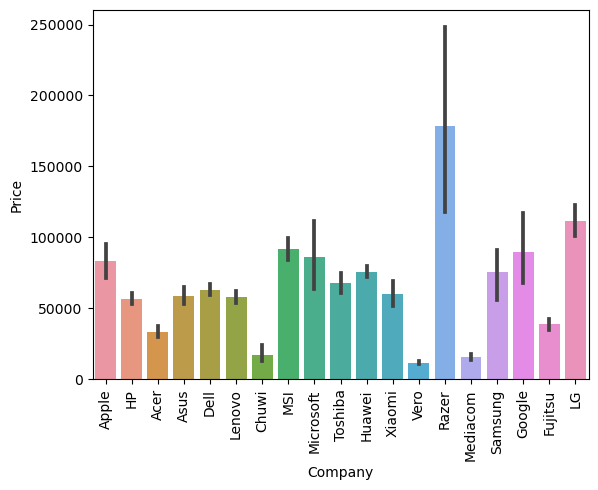

In [9]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

1) Above first bar graphs indicates that Dell, Lenova and HP laptop are the most popular choices among the customers.

2) Second bar graph indicate sthat Price of Razer laptop is Highest among all the other manufacturer companies.

<AxesSubplot:>

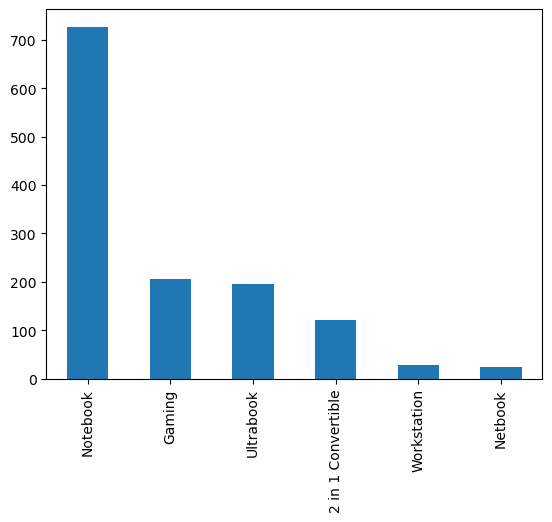

In [10]:
df['TypeName'].value_counts().plot(kind='bar')

1) Most of the customers prefer the Notebook category laptop. And then Gamimng laptop.

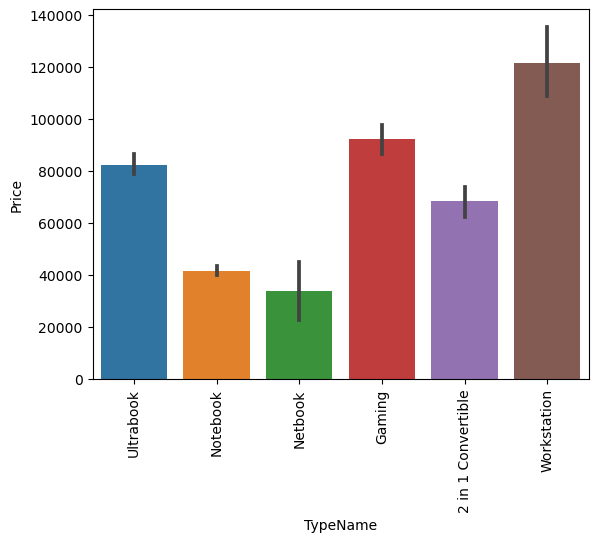

In [11]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

1) Above bar graph represents the category and its prices.

2) This graph indicates that Workstation category has highest price.

3) Gaming and Ultrabook category are on second and third position respectivetly.

<AxesSubplot:>

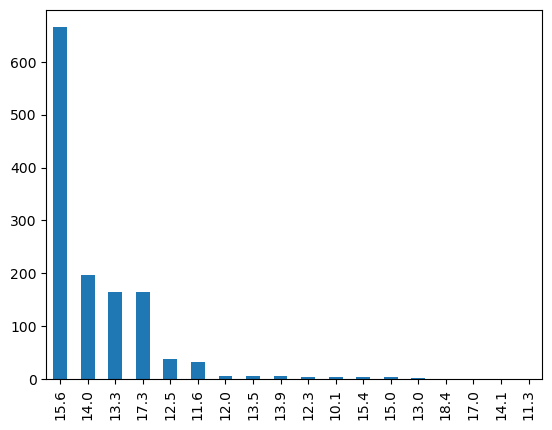

In [12]:
df['Inches'].value_counts().plot(kind='bar')

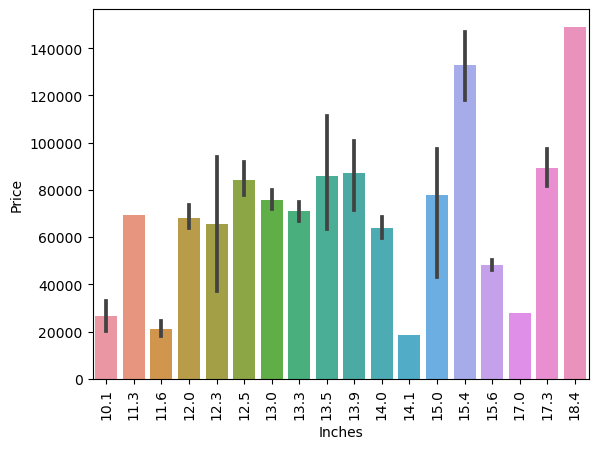

In [13]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

1) Above first bargraph indicates that most of customers buys the laptop whose screen size will be 15.6". And there are some customers who purchases the 14.0,13.3 and 17.3 inches laptop.

2) According to second bar graph laptop whose screen size is 18.4" is the most expensive laptops. And then 15.4" is on second rank.

In [14]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [15]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0


<AxesSubplot:>

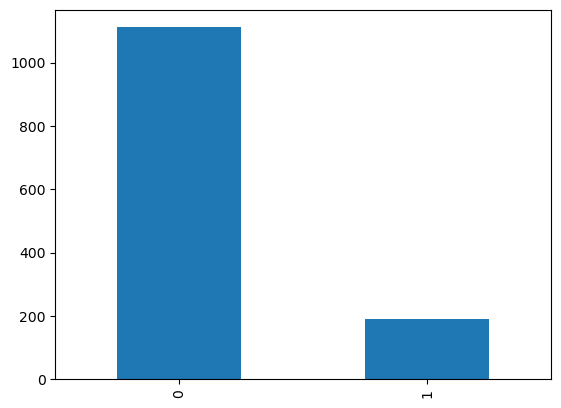

In [16]:
df['TouchScreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

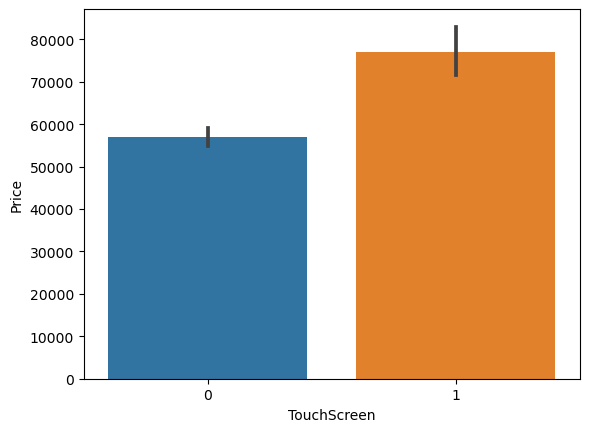

In [17]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [18]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['IPS']

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: IPS, Length: 1303, dtype: int64

<AxesSubplot:>

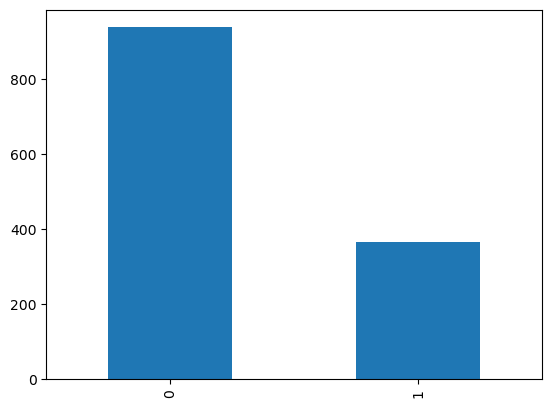

In [19]:
df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

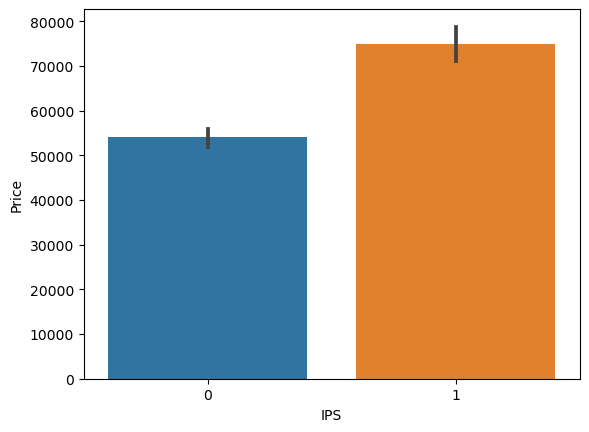

In [20]:
sns.barplot(x=df['IPS'],y=df['Price'])

1) Most of the customers preferred the Non touchscreen laptop.

2) Touchscreen laptops are the more expensive than the non touchscreen laptops.

3) Non-IPS laptops are preferred by consumers.

4) Laptops with IPS are the most expensive.

In [21]:
new = df['ScreenResolution'].str.split('x',expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [22]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [23]:
df['X_res'] = df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


In [25]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


In [26]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [27]:
df.corr()['Price']

Inches         0.068197
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [28]:
#ppi = Pixels per inch 
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [29]:
df.corr()['Price']

Inches         0.068197
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [30]:
df.drop(columns=['Inches'],inplace=True)

In [31]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kgs?','')

In [32]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [33]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,100.454670


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   TouchScreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  X_res        1303 non-null   int32  
 12  Y_res        1303 non-null   int32  
 13  ppi          1303 non-null   float64
dtypes: float32(1), float64(2), int32(3), int64(2), object(6)
memory usage: 122.3+ KB


<AxesSubplot:>

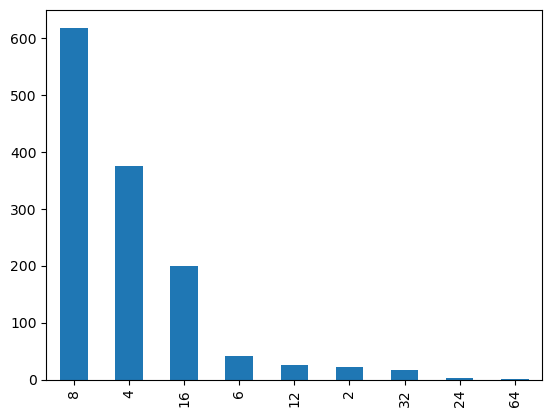

In [35]:
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

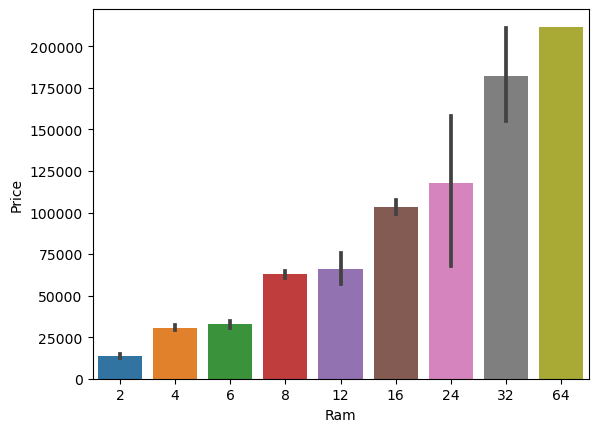

In [36]:
sns.barplot(x=df['Ram'],y=df['Price'])

1) Above graphs indicates that most of customers buys the laptop with 8GB RAM.

2) Only few customers buy 24GB and 64GB RAM laptops.

3) Price of 64GB laptop is highest among the all other RAM laptops.

4) As the RAM increases the price of the laptop also increases.

<AxesSubplot:ylabel='Density'>

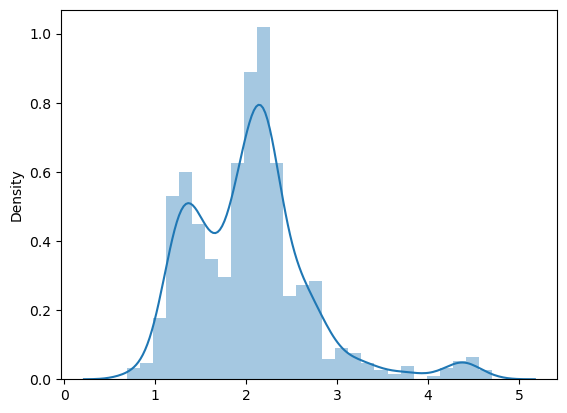

In [37]:
sns.distplot(x=df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

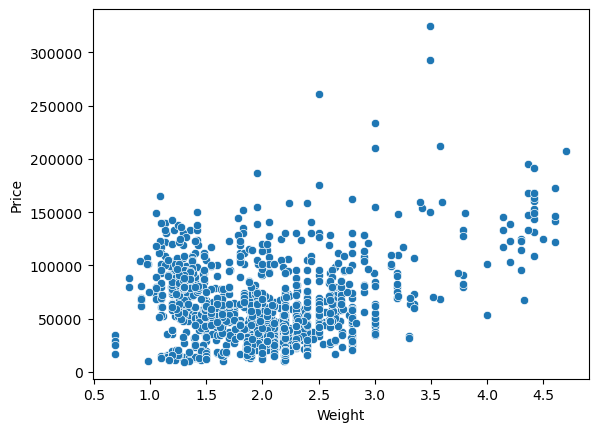

In [38]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [39]:
df['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object

In [40]:
df['CPU Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204,Intel Celeron Dual
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,100.454670,Intel Core i7


In [41]:
def fetch_processor(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [42]:
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)

<AxesSubplot:>

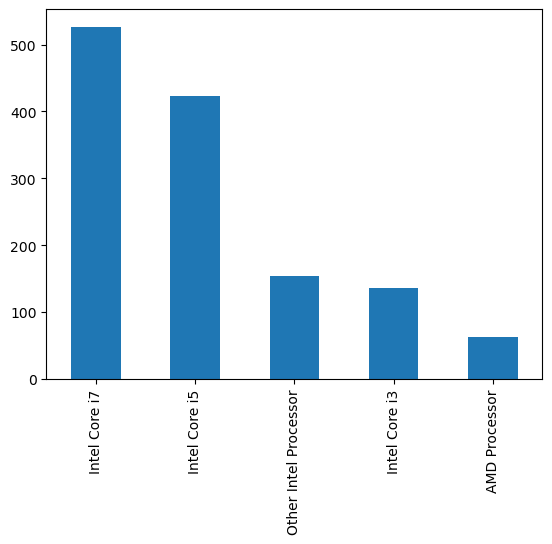

In [43]:
df['CPU Brand'].value_counts().plot(kind='bar')

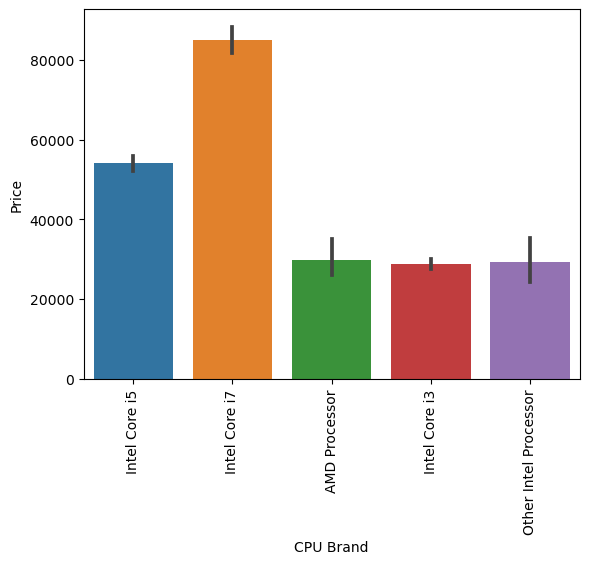

In [44]:
sns.barplot(x=df['CPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

1) A laptop with an Intel Core i7 processor is the most popular followed by a laptop with an Intel Core i5.

2) Laptops with an Intel Core i7 processor are the most expensive models, followed by those with an Intel Core i5.

In [45]:
df.drop(columns=['Cpu'],inplace=True)

In [46]:
df.drop(columns=['CPU Name'],inplace=True)

In [47]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [48]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB','000')
new = df['Memory'].str.split("+",n=1,expand=True)

In [50]:
df['first'] = new[0]
df['first'] = df['first'].str.strip()

df['second'] = new[1]

In [51]:
df['Layer1HDD'] = df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D','')

In [52]:
df['second'].fillna("0",inplace=True)

df['Layer2HDD'] = df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D','')

In [53]:
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

In [54]:
df['HDD'] = (df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

In [55]:
#df['Storage']
#df['first']
#df['Layer1HDD']
#df['Layer1SSD']
#df['Layer1Hybrid']
#df['Layer1Flash_Storage']
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,0,0,0,0,0,0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,0,0,0,0,0,0,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,0,1,0,0,0,0,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,0,0,0,0,0,0,1000,0,0,0


In [56]:
df.drop(columns=['first','second','Layer1HDD','Layer2HDD','Layer1SSD','Layer2SSD','Layer1Hybrid','Layer2Hybrid',
                 'Layer1Flash_Storage','Layer2Flash_Storage'],inplace=True)

In [57]:
df.drop(columns=['Memory'],inplace=True)

In [58]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,0,0


In [59]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
X_res            0.556529
Y_res            0.552809
ppi              0.473487
HDD             -0.093701
SSD              0.670799
Hybrid           0.008747
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [60]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [61]:
df['GPU Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [62]:
df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Brand, dtype: int64

In [63]:
df = df[df['GPU Brand'] != 'ARM']

<AxesSubplot:xlabel='GPU Brand', ylabel='Price'>

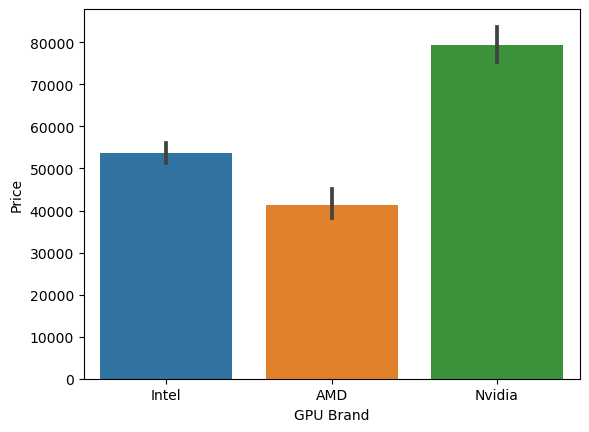

In [64]:
sns.barplot(x=df['GPU Brand'],y=df['Price'])

1) Nvidia GPU brands' laptops are more expnsive than the Intel and AMD.

In [65]:
df.drop(columns=['Gpu'],inplace=True)

In [66]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

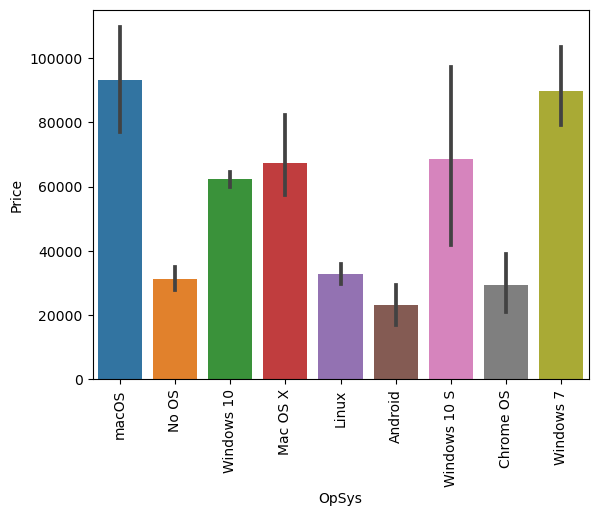

In [67]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
def cat_os(x):
    if x == 'Mac OS' or x == 'macOS':
        return "Mac"
    elif x == 'Windowss 10' or x == 'Windows 10 S' or x == 'Windows 7':
        return 'Windows'
    else:
        return 'Others/No OS/Chroms OS/Linux/Android'

In [69]:
df['OS'] = df['OpSys'].apply(cat_os)

In [70]:
df.drop(columns=['OpSys'],inplace=True)

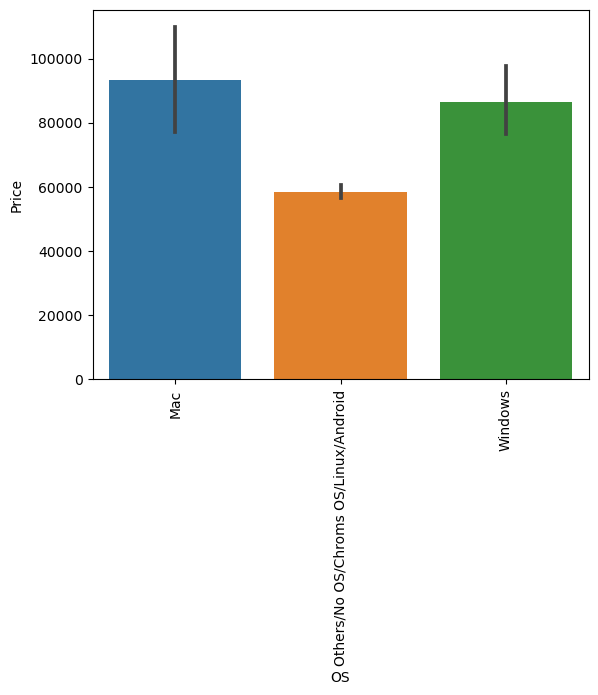

In [71]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

1) Laptops with Mac operating systems are the most expensive laptops, followed by the Windows operating system. And other operating systems laptops are least expensive than the Mac and Windows.

<AxesSubplot:xlabel='Price', ylabel='Density'>

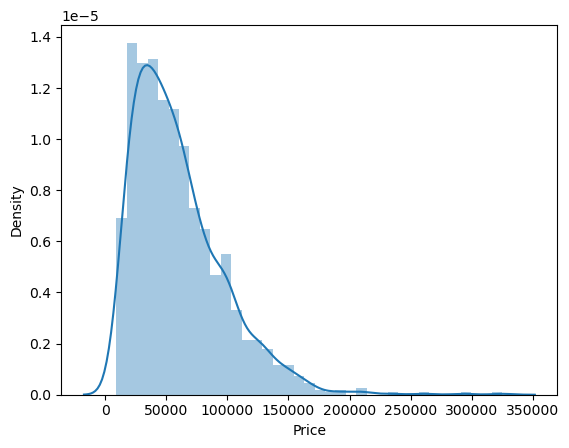

In [72]:
sns.distplot(df['Price'])

The above graph shows that Price data are in a positively skewed nature.

<AxesSubplot:>

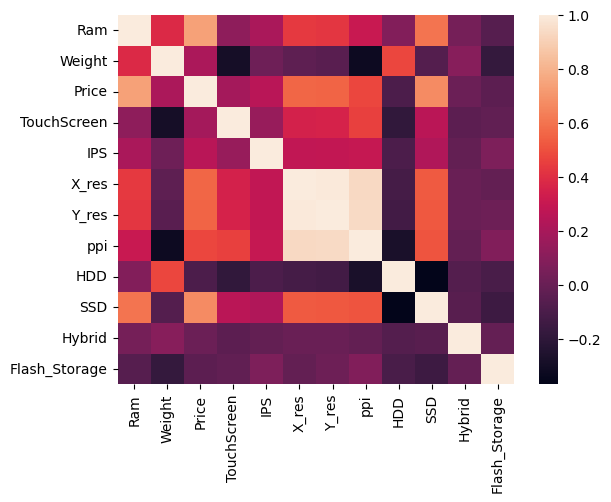

In [73]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Density'>

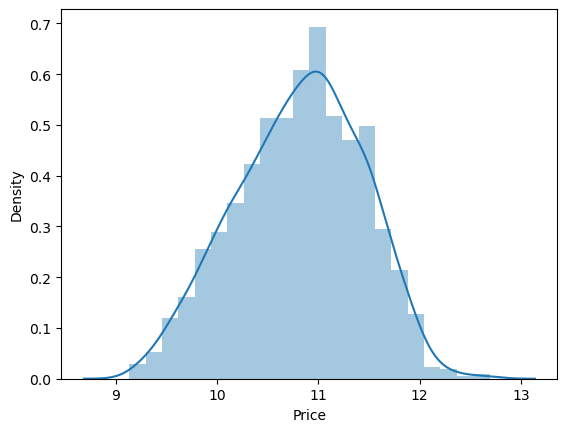

In [74]:
sns.distplot(np.log(df['Price']))

In [75]:
df.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
TouchScreen      0.192917
IPS              0.253320
X_res            0.557369
Y_res            0.554591
ppi              0.475368
HDD             -0.094106
SSD              0.670660
Hybrid           0.008702
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [76]:
df.drop(columns=['X_res','Y_res','Hybrid','Flash_Storage'],inplace=True)

In [77]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [78]:
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Chroms OS/Linux/Android
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Others/No OS/Chroms OS/Linux/Android
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Others/No OS/Chroms OS/Linux/Android
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Others/No OS/Chroms OS/Linux/Android
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Others/No OS/Chroms OS/Linux/Android


In [79]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

### Traing an Testing Data

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [81]:
s1 = ColumnTransformer(transformers=[('col',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

### Linear Regression

In [82]:
lin = LinearRegression()

In [83]:
pipe = Pipeline([('a1',s1),('a2',lin)])
pipe.fit(X_train,y_train)


Pipeline(steps=[('a1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('a2', LinearRegression())])

In [84]:
y_pred = pipe.predict(X_test)

In [85]:
print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.7903959664413542
MAE 0.21708831271694526


In [86]:
np.exp(0.18)

1.1972173631218102

### KNN

In [87]:
KNN = KNeighborsRegressor()

In [88]:
pipe = Pipeline([('a1',s1),('a3',KNN)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('a1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('a3', KNeighborsRegressor())])

In [89]:
y_pred = pipe.predict(X_test)

In [90]:
print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.79625497125414
MAE 0.2068602614348305


### Decision Tree

In [91]:
dtr = DecisionTreeRegressor(random_state=0)
pipe = Pipeline([('a1',s1),('a2',dtr)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('a1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('a2', DecisionTreeRegressor(random_state=0))])

In [92]:
y_pred = pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8278726876610247
MAE 0.18876106794317454


### SVM

In [93]:
svm = SVR(kernel='rbf')
pipe = Pipeline([('a1',s1),('a2',svm)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('a1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('a2', SVR())])

In [94]:
y_pred = pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.6095357885751044
MAE 0.29722604888379767


### Random Forest

In [95]:
rf = RandomForestRegressor(random_state=0)

In [96]:
pipe = Pipeline([('a1',s1),('a2',rf)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('a1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('a2', RandomForestRegressor(random_state=0))])

In [97]:
y_pred = pipe.predict(X_test)
print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.8744584966723123
MAE 0.1601523987769188


# Accuracy of the all the models

1) Linear Regression = 0.7903

2) KNN = 0.7962

3) Decision Tree = 0.8278

4) SVM = 0.6095

5) Random Forest = 0.8744

From all of the above models Random forest has the highest accuracy score so we will consider Random forest model for this dataset.

In [98]:
import pickle

pickle.dump(df,open('df.pkl','wb'),protocol=2)
pickle.dump(pipe,open('pipe.pkl','wb'),protocol=2)